<a href="https://colab.research.google.com/github/jyoti922/ERPP-RMTPP/blob/master/exact_TadGAN_trail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Orion Library**

In [1]:
# install dependencies then restart kernel and run again
! pip install orion-ml
! pip install 'urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1'

! git clone https://github.com/signals-dev/Orion.git
#moving all the required modules in current working directory
! mv Orion/notebooks/tulog/* .

fatal: destination path 'Orion' already exists and is not an empty directory.
mv: cannot stat 'Orion/notebooks/tulog/*': No such file or directory


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# -*- coding: utf-8 -*-
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters

np.random.seed(0)



def convert_date(timelist):
    converted = list()
    for x in timelist:
        converted.append(datetime.fromtimestamp(x))
    return converted

def convert_date_single(x):
    return datetime.fromtimestamp(x)

def plot_ts(X, labels=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    
    if not isinstance(X, list):
        X = [X]
  
    for x in X:
        t = range(len(x))
        plt.plot(t, x)
    
    plt.title('NYC Taxi Demand', size=34)
    plt.ylabel('# passengers', size=30)
    plt.xlabel('Time', size=30)
    plt.xticks(size=26)
    plt.yticks(size=26)
    plt.xlim([t[0], t[-1]])
    
    if labels:
        plt.legend(labels=labels, loc=1, prop={'size': 26})
    
    plt.show()

def plot_error(X):
    plt.figure(figsize = (30, 6))
    gs1 = gridspec.GridSpec(3, 1)
    gs1.update(wspace=0.025, hspace=0.05) 

    i = 0
    for x in X:
        if len(x) == 2:
            ax1 = plt.subplot(gs1[i:i+2])
            for line in x:
                t = range(len(line))
                ax1.plot(t, line)
            i+=1
        else:
            ax1 = plt.subplot(gs1[i])
            t = range(len(line))
            ax1.plot(t, x, color='tab:red')

        i+=1
        plt.xlim(t[0], t[-1])
        plt.yticks(size=22)
        plt.axis('on')
        ax1.set_xticklabels([])

    plt.show()


def plot(dfs, anomalies=[]):
    """ Line plot for time series.
    
    This function plots time series and highlights anomalous regions.
    The first anomaly in anomalies is considered the ground truth.
    
    Args:
        dfs (list or `pd.DataFrame`): List of time series in `pd.DataFrame`.
            Or a single dataframe. All dataframes must have the same shape.
        anomalies (list): List of anomalies in tuple format.
    """    
    if isinstance(dfs, pd.DataFrame):
        dfs = [dfs]
        
    if not isinstance(anomalies, list):
        anomalies = [anomalies]
        
    df = dfs[0]
    time = convert_date(df['timestamp'])
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator() # every day

    month_fmt = mdates.DateFormatter('%b')

    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)

    for df in dfs:
        plt.plot(time, df['value'])

    colors = ['red'] + ['green'] * (len(anomalies) - 1)
    for i, anomaly in enumerate(anomalies):
        if not isinstance(anomaly, list):
            anomaly = list(anomaly[['start', 'end']].itertuples(index=False))
        
        for _, anom in enumerate(anomaly):
            t1 = convert_date_single(anom[0])
            t2 = convert_date_single(anom[1])
            plt.axvspan(t1, t2, color=colors[i], alpha=0.2)

    plt.title('NYC Taxi Demand', size=34)
    plt.ylabel('# passengers', size=30)
    plt.xlabel('Time', size=30)
    plt.xticks(size=26)
    plt.yticks(size=26)
    plt.xlim([time[0], time[-1]])

    # format xticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.xaxis.set_minor_locator(days)
    
    # format yticks
    ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels)
    
    plt.show()
    
    


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/timestamp_powerdata.xlsx')
df

,timestamp,Zone 1,Zone2,Zone3,Zone4,Zone5,Zone6,Zone7,Zone8
0,1599138219,126.614718,144.922412,120.630971,138.472675,138.157444,115.238102,96.413475,125.412280
1,1599138220,145.905920,151.509969,126.843147,153.276540,141.098539,123.833101,102.408733,122.158421
2,1599138221,123.453660,143.351057,145.643515,142.867398,140.907234,117.593681,102.757949,133.617101
3,1599138222,127.735063,140.664908,141.038155,131.716430,138.505635,121.111446,103.946552,116.576998
4,1599138223,118.461070,128.650722,116.086310,143.720222,138.892139,122.205243,106.692134,113.199495
5,1599138224,124.969732,132.786738,138.333147,136.511931,130.922432,127.731536,99.350228,127.805665
6,1599138225,132.965882,142.214494,130.312769,135.262423,128.692621,121.674855,100.466872,133.545158
7,1599138226,121.667079,137.581290,134.691437,142.619364,129.710025,129.984504,103.611973,130.995859
8,1599138227,136.804668,135.986775,126.099628,130.379431,130.059493,146.058003,98.038261,128.935189
9,1599138228,126.235079,141.767735,131.083684,126.219895,127.739639,134.835621,100.576961,123.190152


# **Importing required libraries**

In [ ]:
# general imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#importing sklearn module
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
#utils.py contains all the plot function.
#from utils import plot, plot_ts, plot_rws, plot_error, unroll_ts

# **Importing the dataset**

### **Primitives**

## **Data Preparation**

### **1. Data Frequency**

In [ ]:
def time_segments_aggregate(X, interval, time_column, method=['mean']):
    """Aggregate values over given time span.
    Args:
        X (ndarray or pandas.DataFrame):
            N-dimensional sequence of values.
        interval (int):
            Integer denoting time span to compute aggregation of.
        time_column (int):
            Column of X that contains time values.
        method (str or list):
            Optional. String describing aggregation method or list of strings describing multiple
            aggregation methods. If not given, `mean` is used.
    Returns:
        ndarray, ndarray:
            * Sequence of aggregated values, one column for each aggregation method.
            * Sequence of index values (first index of each aggregated segment).
    """
    #checking for the input datatype as numpy array and converting it to dataframe
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    #sorting the values on timestamp column and setting it as a index
    X = X.sort_values(time_column).set_index(time_column)

    if isinstance(method, str):
        method = [method]

    start_ts = X.index.values[0]
    max_ts = X.index.values[-1]

    values = list()
    index = list()
    while start_ts <= max_ts:
        end_ts = start_ts + interval
        subset = X.loc[start_ts:end_ts - 1]
        aggregated = [
            getattr(subset, agg)(skipna=True).values
            for agg in method
        ]
        values.append(np.concatenate(aggregated))
        index.append(start_ts)
        start_ts = end_ts

    return np.asarray(values), np.asarray(index)
#here df is the given dataframe and "timestamp" is the required column to be altered.
X, index = time_segments_aggregate(df, interval=1, time_column='timestamp')

In [ ]:
X.shape

(1000, 8)

### **2. Data Imputation**

In [ ]:
#Using the simple scikit imputer
imp = SimpleImputer()
X = imp.fit_transform(X)

### **3. Data Normalization**

In [ ]:
#Normalizing the data using scikit-learn MinMaxScalar
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

### **4. Data Slicing**

In [ ]:
def rolling_window_sequences(X, index, window_size, target_size, step_size, 
                             drop=None, drop_windows=False):
    """Create rolling window sequences out of time series data.
    The function creates an array of input sequences and an array of target sequences by rolling
    over the input sequence with a specified window.
    Optionally, certain values can be dropped from the sequences.
    Args:
        X (ndarray):
            N-dimensional sequence to iterate over.
        index (ndarray):
            Array containing the index values of X.
        window_size (int):
            Length of the input sequences.
        target_size (int):
            Length of the target sequences.
        step_size (int):
            Indicating the number of steps to move the window forward each round.
        target_column (int):
            Indicating which column of X is the target.
        drop (ndarray or None or str or float or bool):
            Optional. Array of boolean values indicating which values of X are invalid, or value
            indicating which value should be dropped. If not given, `None` is used.
        drop_windows (bool):
            Optional. Indicates whether the dropping functionality should be enabled. If not
            given, `False` is used.
    Returns:
        ndarray, ndarray, ndarray, ndarray:
            * input sequences.
            * target sequences.
            * first index value of each input sequence.
            * first index value of each target sequence.
    """
    out_X = list()
    out_y = list()
    X_index = list()
    y_index = list()
    target = X[:, 0 :]

    if drop_windows:
        if hasattr(drop, '__len__') and (not isinstance(drop, str)):
            if len(drop) != len(X):
                raise Exception('Arrays `drop` and `X` must be of the same length.')
        else:
            if isinstance(drop, float) and np.isnan(drop):
                drop = np.isnan(X)
            else:
                drop = X == drop

    start = 0
    max_start = len(X) - window_size - target_size + 1
    while start < max_start:
        end = start + window_size

        if drop_windows:
            drop_window = drop[start:end + target_size]
            to_drop = np.where(drop_window)[0]
            if to_drop.size:
                start += to_drop[-1] + 1
                continue

        out_X.append(X[start:end])
        out_y.append(target[end:end + target_size])
        X_index.append(index[start])
        y_index.append(index[end])
        start = start + step_size

    return np.asarray(out_X), np.asarray(out_y), np.asarray(X_index), np.asarray(y_index)
#the target value; the value at time t.
#previous observed values, this is determined by the window width.
X, y, X_index, y_index = rolling_window_sequences(X, index, 
                                                  window_size=100, 
                                                  target_size=1, 
                                                  step_size=1,
                                                  )

In [ ]:
print("Training data input shape: {}".format(X.shape))
print("Training data index shape: {}".format(X_index.shape))
print("Training y shape: {}".format(y.shape))
print("Training y index shape: {}".format(y_index.shape))

Training data input shape: (900, 100, 8)
Training data index shape: (900,)
Training y shape: (900, 1, 8)
Training y index shape: (900,)


In [ ]:
y

array([[[-0.803039  , -0.60172007, -0.55683313, ..., -0.52676145,
         -0.80020758, -0.62015999]],

       [[-0.83067357, -0.5633983 , -0.51810891, ..., -0.52498161,
         -0.82128207, -0.5904531 ]],

       [[-0.81418383, -0.57092546, -0.54146745, ..., -0.55524309,
         -0.80382577, -0.66832398]],

       ...,

       [[-0.77764098, -0.97945216, -0.96002562, ..., -1.        ,
         -0.96145171, -0.98067196]],

       [[-0.78358478, -0.98032297, -0.93384164, ..., -0.95249211,
         -0.94990253, -0.98267942]],

       [[-0.80492688, -0.97846349, -0.96439559, ..., -0.96562913,
         -0.96787365, -0.98667651]]])

In [ ]:
def plot_rws(X, window=100, k=5, lim=1000):
    shift = 25
    X = X[window:]
    t = range(len(X))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    
    num_figs = int(np.ceil(k / 5)) + 1
    fig = plt.figure(figsize=(15, num_figs * 2))
    
    j = 0
    ax = fig.add_subplot(num_figs, 5, j+1)
    idx = t[j: window + j]
    ax.plot(idx, X[j], lw=2, color=colors[j])
    plt.title("window %d" % j, size=16)
    plt.ylim([-1, 1])
    
    j = 1
    ax = fig.add_subplot(num_figs, 5, j+1)
    idx = t[j: window + j]
    ax.plot(idx, X[j], lw=2, color=colors[j])
    ax.set_yticklabels([])
    plt.title("window %d" % j, size=16)
    plt.ylim([-1, 1])
        
    for i in range(2, k):
        j = i * shift
        idx = t[j: window + j]
        
        ax = fig.add_subplot(num_figs, 5, i+1)
        ax.plot(idx, X[j], lw=2, color=colors[i+1])
        ax.set_yticklabels([])
        plt.title("window %d" % j, size=16)
        plt.ylim([-1, 1])
    
    plt.tight_layout()
    plt.show()

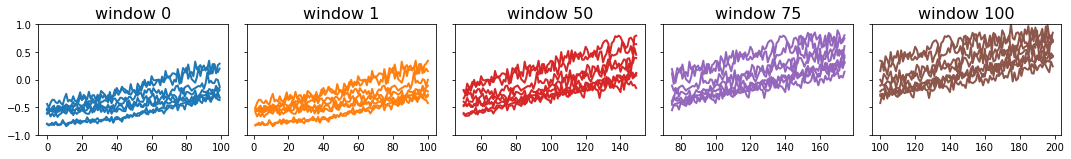

In [ ]:
#function from utils.py module. Representing all the windows that has been created by slicing
#Here X represents the input used to train the model. In the previous example, we see X has 10222 training data points.
#Notice that 100 represents the window size. On the other hand, y is the real signal after processing, 
#which we will use later on to calculate the error between the reconstructed and real signal.
plot_rws(X)

In [ ]:
# -*- coding: utf-8 -*-

encoder = [
    {
        "class": "keras.layers.Bidirectional",
        "parameters": {
            "layer": {
                "class": "keras.layers.LSTM",
                "parameters": {
                    "units": 100,
                    "return_sequences": True
                }
            }
        }
    },
    {
        "class": "keras.layers.Flatten",
        "parameters": {}
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 24
        }
    },
    {
        "class": "keras.layers.Reshape",
        "parameters": {
            "target_shape": "encoder_reshape_shape"
        }
    }
]

generator = [
    {
        "class": "keras.layers.Flatten",
        "parameters": {}
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 50
        }
    },
    {
        "class": "keras.layers.Reshape",
        "parameters": {
            "target_shape": "generator_reshape_shape"
        }
    },
    {
        "class": "keras.layers.Bidirectional",
        "parameters": {
            "layer": {
                "class": "keras.layers.LSTM",
                "parameters": {
                    "units": 40,
                    "return_sequences": True,
                    "dropout": 0.2,
                    "recurrent_dropout": 0.2
                }
            },
            "merge_mode": "concat"
        }
    },
    {
        "class": "keras.layers.convolutional.UpSampling1D",
        "parameters": {
            "size": 2
        }
    },
    {
        "class": "keras.layers.Bidirectional",
        "parameters": {
            "layer": {
            "class": "keras.layers.LSTM",
            "parameters": {
                "units":40,
                "return_sequences": True,
                "dropout": 0.2,
                "recurrent_dropout": 0.2
                }
            },
            "merge_mode": "concat"
        }
    },
    {
        "class": "keras.layers.TimeDistributed",
        "parameters": {
            "layer": {
                "class": "keras.layers.Dense",
                "parameters": {
                    "units": 8
                }
            }
        }
    },
    {
        "class": "keras.layers.Activation",
        "parameters": {
            "activation": "tanh"
        }
    }
]

criticX = [
    {
        "class": "keras.layers.Conv1D",
        "parameters": {
            "filters": 40,
            "kernel_size": 5
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.25
        }
    },
    {
        "class": "keras.layers.Conv1D",
        "parameters": {
            "filters": 40,
            "kernel_size": 5
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.25
        }
    },
    {
    "class": "keras.layers.Conv1D",
        "parameters": {
            "filters": 40,
            "kernel_size": 5
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.25
        }
    },
    {
        "class": "keras.layers.Conv1D",
        "parameters": {
            "filters": 40,
            "kernel_size": 5
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.25
    }
    },
    {
        "class": "keras.layers.Flatten",
        "parameters": {}
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 1
        }
    }
]

criticZ = [
    {
        "class": "keras.layers.Flatten",
        "parameters": {}
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 100
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.2
        }
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 100
        }
    },
    {
        "class": "keras.layers.advanced_activations.LeakyReLU",
        "parameters": {
            "alpha": 0.2
        }
    },
    {
        "class": "keras.layers.Dropout",
        "parameters": {
            "rate": 0.2
        }
    },
    {
        "class": "keras.layers.Dense",
        "parameters": {
            "units": 1
        }
    }
]

hyperparameters = {
    "epochs": 35,
    "input_shape": (100, 8),
    "target_shape": (100, 8),
    "optimizer": "keras.optimizers.Adam",
    "learning_rate": 0.0005,
    "latent_dim": 24,
    "batch_size": 40,
    "n_critic": 5,
    "encoder_reshape_shape":(24, 1),
    "generator_reshape_shape":(50, 8),
    "generator_reshape_dim": 8,
    "layers_encoder": encoder,
    "layers_generator": generator,
    "layers_critic_x": criticX,
    "layers_critic_z": criticZ
}

In [ ]:
# -*- coding: utf-8 -*-

import logging
import math
import tempfile
from functools import partial

import keras
import numpy as np
import pandas as pd
from keras import backend as K
from keras.layers import Input
from keras.layers.merge import _Merge
from keras.models import Model
from mlprimitives.adapters.keras import build_layer
from mlprimitives.utils import import_object
from scipy import stats

from orion.primitives.timeseries_errors import reconstruction_errors

LOGGER = logging.getLogger(__name__)


class RandomWeightedAverage(_Merge):
    def _merge_function(self, inputs):
        """
        Args:
            inputs[0] x     original input
            inputs[1] x_    predicted input
        """
        alpha = K.random_uniform((40, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])


class TadGAN(object):
    """TadGAN model for time series reconstruction.

    Args:
        shape (tuple):
            Tuple denoting the shape of an input sample.
        encoder_input_shape (tuple):
            Shape of encoder input.
        generator_input_shape (tuple):
            Shape of generator input.
        critic_x_input_shape (tuple):
            Shape of critic_x input.
        critic_z_input_shape (tuple):
            Shape of critic_z input.
        layers_encoder (list):
            List containing layers of encoder.
        layers_generator (list):
            List containing layers of generator.
        layers_critic_x (list):
            List containing layers of critic_x.
        layers_critic_z (list):
            List containing layers of critic_z.
        optimizer (str):
            String denoting the keras optimizer.
        learning_rate (float):
            Optional. Float denoting the learning rate of the optimizer. Default 0.005.
        epochs (int):
            Optional. Integer denoting the number of epochs. Default 2000.
        latent_dim (int):
            Optional. Integer denoting dimension of latent space. Default 20.
        batch_size (int):
            Integer denoting the batch size. Default 64.
        iterations_critic (int):
            Optional. Integer denoting the number of critic training steps per one
            Generator/Encoder training step. Default 5.
        hyperparameters (dictionary):
            Optional. Dictionary containing any additional inputs.
    """

    def __getstate__(self):
        networks = ['critic_x', 'critic_z', 'encoder', 'generator']
        modules = ['optimizer', 'critic_x_model', 'critic_z_model', 'encoder_generator_model']

        state = self.__dict__.copy()

        for module in modules:
            del state[module]

        for network in networks:
            with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=False) as fd:
                keras.models.save_model(state.pop(network), fd.name, overwrite=True)

                state[network + '_str'] = fd.read()

        return state

    def __setstate__(self, state):
        networks = ['critic_x', 'critic_z', 'encoder', 'generator']
        for network in networks:
            with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=False) as fd:
                fd.write(state.pop(network + '_str'))
                fd.flush()

                state[network] = keras.models.load_model(fd.name)

        self.__dict__ = state

    def _build_model(self, hyperparameters, layers, input_shape):
        x = Input(shape=input_shape)
        model = keras.models.Sequential()

        for layer in layers:
            built_layer = build_layer(layer, hyperparameters)
            model.add(built_layer)

        return Model(x, model(x))

    def _setdefault(self, kwargs, key, value):
        if key in kwargs:
            return

        if key in self.hyperparameters and self.hyperparameters[key] is None:
            kwargs[key] = value

    def _wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def _gradient_penalty_loss(self, y_true, y_pred, averaged_samples):
        gradients = K.gradients(y_pred, averaged_samples)[0]
        gradients_sqr = K.square(gradients)
        gradients_sqr_sum = K.sum(gradients_sqr, axis=np.arange(1, len(gradients_sqr.shape)))
        gradient_l2_norm = K.sqrt(gradients_sqr_sum)
        gradient_penalty = K.square(1 - gradient_l2_norm)
        return K.mean(gradient_penalty)

    def __init__(self, layers_encoder, layers_generator, layers_critic_x, layers_critic_z,
                 optimizer, input_shape=(100, 8), target_shape=(100, 8), latent_dim=24,
                 learning_rate=0.0005, epochs=2000, batch_size=40, iterations_critic=5,
                 **hyperparameters):

        self.shape = input_shape
        self.epochs = epochs
        self.batch_size = batch_size
        self.latent_dim = latent_dim
        self.latent_shape = (latent_dim, 1)
        self.target_shape = target_shape
        self.iterations_critic = iterations_critic

        self.layers_encoder, self.layers_generator = layers_encoder, layers_generator
        self.layers_critic_x, self.layers_critic_z = layers_critic_x, layers_critic_z

        self.optimizer = import_object(optimizer)(learning_rate)

        self.hyperparameters = hyperparameters

    def _augment_hyperparameters(self, X, y, kwargs):
        shape = np.asarray(X)[0].shape
        length = shape[0]
        target_shape = np.asarray(y)[0].shape

        # to infer the shape
        self.shape = self.shape or shape
        self.target_shape = self.target_shape or target_shape

        self._setdefault(kwargs, 'generator_reshape_dim', length // 2)
        self._setdefault(kwargs, 'generator_reshape_shape', (length // 2, 1))
        self._setdefault(kwargs, 'encoder_reshape_shape', self.latent_shape)

        return kwargs

    def _set_shapes(self):
        self.encoder_input_shape = self.shape
        self.generator_input_shape = self.latent_shape
        self.critic_x_input_shape = self.target_shape
        self.critic_z_input_shape = self.latent_shape

    def _build_tadgan(self, **kwargs):
        hyperparameters = self.hyperparameters.copy()
        hyperparameters.update(kwargs)

        self.encoder = self._build_model(hyperparameters, self.layers_encoder,
                                         self.encoder_input_shape)
        self.generator = self._build_model(hyperparameters, self.layers_generator,
                                           self.generator_input_shape)
        self.critic_x = self._build_model(hyperparameters, self.layers_critic_x,
                                          self.critic_x_input_shape)
        self.critic_z = self._build_model(hyperparameters, self.layers_critic_z,
                                          self.critic_z_input_shape)

        self.generator.trainable = False
        self.encoder.trainable = False

        x = Input(shape=self.shape)
        y = Input(shape=self.target_shape)
        z = Input(shape=(self.latent_dim, 1))

        x_ = self.generator(z)
        z_ = self.encoder(x)
        fake_x = self.critic_x(x_)
        valid_x = self.critic_x(y)

        interpolated_x = RandomWeightedAverage()([y, x_])
        validity_interpolated_x = self.critic_x(interpolated_x)
        partial_gp_loss_x = partial(self._gradient_penalty_loss, averaged_samples=interpolated_x)
        partial_gp_loss_x.__name__ = 'gradient_penalty'
        self.critic_x_model = Model(inputs=[y, z], outputs=[valid_x, fake_x,
                                                            validity_interpolated_x])
        self.critic_x_model.compile(loss=[self._wasserstein_loss, self._wasserstein_loss,
                                          partial_gp_loss_x], optimizer=self.optimizer,
                                    loss_weights=[1, 1, 10])

        fake_z = self.critic_z(z_)
        valid_z = self.critic_z(z)
        interpolated_z = RandomWeightedAverage()([z, z_])
        validity_interpolated_z = self.critic_z(interpolated_z)
        partial_gp_loss_z = partial(self._gradient_penalty_loss, averaged_samples=interpolated_z)
        partial_gp_loss_z.__name__ = 'gradient_penalty'
        self.critic_z_model = Model(inputs=[x, z], outputs=[valid_z, fake_z,
                                                            validity_interpolated_z])
        self.critic_z_model.compile(loss=[self._wasserstein_loss, self._wasserstein_loss,
                                          partial_gp_loss_z], optimizer=self.optimizer,
                                    loss_weights=[1, 1, 10])

        self.critic_x.trainable = False
        self.critic_z.trainable = False
        self.generator.trainable = True
        self.encoder.trainable = True

        z_gen = Input(shape=(self.latent_dim, 1))
        x_gen_ = self.generator(z_gen)
        x_gen = Input(shape=self.shape)
        z_gen_ = self.encoder(x_gen)
        x_gen_rec = self.generator(z_gen_)
        fake_gen_x = self.critic_x(x_gen_)
        fake_gen_z = self.critic_z(z_gen_)

        self.encoder_generator_model = Model([x_gen, z_gen], [fake_gen_x, fake_gen_z, x_gen_rec])
        self.encoder_generator_model.compile(loss=[self._wasserstein_loss, self._wasserstein_loss,
                                                   'mse'], optimizer=self.optimizer,
                                             loss_weights=[1, 1, 10])

    def _fit(self, X, target):
        fake = np.ones((self.batch_size, 1))
        valid = -np.ones((self.batch_size, 1))
        delta = np.ones((self.batch_size, 1))

        indices = np.arange(X.shape[0])
        for epoch in range(1, self.epochs + 1):
            np.random.shuffle(indices)
            X_ = X[indices]
            y_ = target[indices]

            epoch_g_loss = []
            epoch_cx_loss = []
            epoch_cz_loss = []

            minibatches_size = self.batch_size * self.iterations_critic
            num_minibatches = int(X_.shape[0] // minibatches_size)

            for i in range(num_minibatches):
                minibatch = X_[i * minibatches_size: (i + 1) * minibatches_size]
                y_minibatch = y_[i * minibatches_size: (i + 1) * minibatches_size]

                for j in range(self.iterations_critic):
                    x = minibatch[j * self.batch_size: (j + 1) * self.batch_size]
                    y = y_minibatch[j * self.batch_size: (j + 1) * self.batch_size]
                    z = np.random.normal(size=(self.batch_size, self.latent_dim, 1))
                    epoch_cx_loss.append(
                        self.critic_x_model.train_on_batch([y, z], [valid, fake, delta]))
                    epoch_cz_loss.append(
                        self.critic_z_model.train_on_batch([x, z], [valid, fake, delta]))

                epoch_g_loss.append(
                    self.encoder_generator_model.train_on_batch([x, z], [valid, valid, y]))

            cx_loss = np.mean(np.array(epoch_cx_loss), axis=0)
            cz_loss = np.mean(np.array(epoch_cz_loss), axis=0)
            g_loss = np.mean(np.array(epoch_g_loss), axis=0)
            print('Epoch: {}/{}, [Dx loss: {}] [Dz loss: {}] [G loss: {}]'.format(
                epoch, self.epochs, cx_loss, cz_loss, g_loss))

    def fit(self, X, y=None, **kwargs):
        """Fit the TadGAN.

        Args:
            X (ndarray):
                N-dimensional array containing the input training sequences for the model.
            y (ndarray):
                N-dimensional array containing the target sequences we want to reconstruct.
        """
        if y is None:
            y = X.copy()  # reconstruct the same input

        self._augment_hyperparameters(X, y, kwargs)
        self._set_shapes()
        self._build_tadgan(**kwargs)
        self._fit(X, y)

    def predict(self, X, y=None):
        """Predict values using the initialized object.

        Args:
            X (ndarray):
                N-dimensional array containing the input sequences for the model.
            y (ndarray):
                N-dimensional array containing the target sequences we want to reconstruct.

        Returns:
            ndarray:
                N-dimensional array containing the reconstructions for each input sequence.
            ndarray:
                N-dimensional array containing the critic scores for each input sequence.
        """
        if y is None:
            y = X.copy()  # reconstruct the same input

        z_ = self.encoder.predict(X)
        y_hat = self.generator.predict(z_)
        critic = self.critic_x.predict(y)

        return y_hat, critic


def _compute_critic_score(critics, smooth_window):
    """Compute an array of anomaly scores.

    Args:
        critics (ndarray):
            Critic values.
        smooth_window (int):
            Smooth window that will be applied to compute smooth errors.

    Returns:
        ndarray:
            Array of anomaly scores.
    """
    critics = np.asarray(critics)
    l_quantile = np.quantile(critics, 0.25)
    u_quantile = np.quantile(critics, 0.75)
    in_range = np.logical_and(critics >= l_quantile, critics <= u_quantile)
    critic_mean = np.mean(critics[in_range])
    critic_std = np.std(critics)

    z_scores = np.absolute((np.asarray(critics) - critic_mean) / critic_std) + 1
    z_scores = pd.Series(z_scores).rolling(
        smooth_window, center=True, min_periods=smooth_window // 2).mean().values

    return z_scores


def score_anomalies(y, y_hat, critic, index, score_window=10, critic_smooth_window=None,
                    error_smooth_window=None, smooth=True, rec_error_type="point", comb="mult",
                    lambda_rec=0.5):
    """Compute an array of anomaly scores.

    Anomaly scores are calculated using a combination of reconstruction error and critic score.

    Args:
        y (ndarray):
            Ground truth.
        y_hat (ndarray):
            Predicted values. Each timestamp has multiple predictions.
        index (ndarray):
            time index for each y (start position of the window)
        critic (ndarray):
            Critic score. Each timestamp has multiple critic scores.
        score_window (int):
            Optional. Size of the window over which the scores are calculated.
            If not given, 10 is used.
        critic_smooth_window (int):
            Optional. Size of window over which smoothing is applied to critic.
            If not given, 200 is used.
        error_smooth_window (int):
            Optional. Size of window over which smoothing is applied to error.
            If not given, 200 is used.
        smooth (bool):
            Optional. Indicates whether errors should be smoothed.
            If not given, `True` is used.
        rec_error_type (str):
            Optional. The method to compute reconstruction error. Can be one of
            `["point", "area", "dtw"]`. If not given, 'point' is used.
        comb (str):
            Optional. How to combine critic and reconstruction error. Can be one
            of `["mult", "sum", "rec"]`. If not given, 'mult' is used.
        lambda_rec (float):
            Optional. Used if `comb="sum"` as a lambda weighted sum to combine
            scores. If not given, 0.5 is used.

    Returns:
        ndarray:
            Array of anomaly scores.
    """

    critic_smooth_window = critic_smooth_window or math.trunc(y.shape[0] * 0.01)
    error_smooth_window = error_smooth_window or math.trunc(y.shape[0] * 0.01)

    step_size = 1  # expected to be 1

    true_index = index  # no offset

    true = [item[0] for item in y.reshape((y.shape[0], -1))]

    for item in y[-1][1:]:
        true.extend(item)

    critic_extended = list()
    for c in critic:
        critic_extended.extend(np.repeat(c, y_hat.shape[1]).tolist())

    critic_extended = np.asarray(critic_extended).reshape((-1, y_hat.shape[1]))

    critic_kde_max = []
    pred_length = y_hat.shape[1]
    num_errors = y_hat.shape[1] + step_size * (y_hat.shape[0] - 1)

    for i in range(num_errors):
        critic_intermediate = []

        for j in range(max(0, i - num_errors + pred_length), min(i + 1, pred_length)):
            critic_intermediate.append(critic_extended[i - j, j])

        if len(critic_intermediate) > 1:
            discr_intermediate = np.asarray(critic_intermediate)
            try:
                critic_kde_max.append(discr_intermediate[np.argmax(
                    stats.gaussian_kde(discr_intermediate)(critic_intermediate))])
            except np.linalg.LinAlgError:
                critic_kde_max.append(np.median(discr_intermediate))
        else:
            critic_kde_max.append(np.median(np.asarray(critic_intermediate)))

    # Compute critic scores
    critic_scores = _compute_critic_score(critic_kde_max, critic_smooth_window)

    # Compute reconstruction scores
    rec_scores, predictions = reconstruction_errors(
        y, y_hat, step_size, score_window, error_smooth_window, smooth, rec_error_type)

    rec_scores = stats.zscore(rec_scores)
    rec_scores = np.clip(rec_scores, a_min=0, a_max=None) + 1

    # Combine the two scores
    if comb == "mult":
        final_scores = np.multiply(critic_scores, rec_scores)

    elif comb == "sum":
        final_scores = (1 - lambda_rec) * (critic_scores - 1) + lambda_rec * (rec_scores - 1)

    elif comb == "rec":
        final_scores = rec_scores

    else:
        raise ValueError(
            'Unknown combination specified {}, use "mult", "sum", or "rec" instead.'.format(comb))

    true = [[t] for t in true]
    return final_scores, true_index, true, predictions


Using TensorFlow backend.


In [ ]:
window_size=100
latent_dim = 40
shape = (window_size, 8)

In [ ]:
#X = X.reshape((-1, shape[0], 1))
#X_ = np.copy(X)

In [ ]:
hyperparameters = {
    "epochs": 35,
    "input_shape": (100, 8),
    "target_shape": (100, 8),
    "optimizer": "keras.optimizers.Adam",
    "learning_rate": 0.0005,
    #"latent_dim": 20,
    "batch_size": 40,
    "n_critic": 5,
    "encoder_reshape_shape":None,
    "generator_reshape_shape":None,
    "generator_reshape_dim": None,
    "layers_encoder": encoder,
    "layers_generator": generator,
    "layers_critic_x": criticX,
    "layers_critic_z": criticZ
}
tgan = TadGAN(**hyperparameters)
tgan.fit(X,X)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected

Epoch: 1/35, [Dx loss: [ 2.3900933  -0.751655    0.02553115  0.3116217 ]] [Dz loss: [2.4012852  0.02824244 0.17281489 0.2200228 ]] [G loss: [ 4.207091   -0.03405105 -0.16902119  0.4410163 ]]
Epoch: 2/35, [Dx loss: [-3.2402515  -4.98149     0.16794616  0.15732919]] [Dz loss: [ 2.4245744  -0.07035847  1.0650524   0.14298804]] [G loss: [ 3.1104212  -0.21014579 -1.1278626   0.444843  ]]
Epoch: 3/35, [Dx loss: [-11.284291  -17.643742    0.7251102   0.5634341]] [Dz loss: [ 3.4342926  -0.14998896  2.733934    0.08503477]] [G loss: [ 1.0035295  -0.7592739  -2.683966    0.44467697]]
Epoch: 4/35, [Dx loss: [-14.59888    -19.813293     1.0429337    0.41714805]] [Dz loss: [ 4.609151   -0.10734089  3.9867096   0.07297827]] [G loss: [-0.09449142 -1.0269984  -3.4157214   0.43482286]]
Epoch: 5/35, [Dx loss: [-16.4024    -23.469883    1.5149854   0.5552501]] [Dz loss: [ 3.8538136e+00 -3.7468164e-03  3.1583233e+00  6.9923691e-02]] [G loss: [ 0.33454096 -1.4740555  -2.1097949   0.39183915]]
Epoch: 6/35, 

## **Training and Detection**

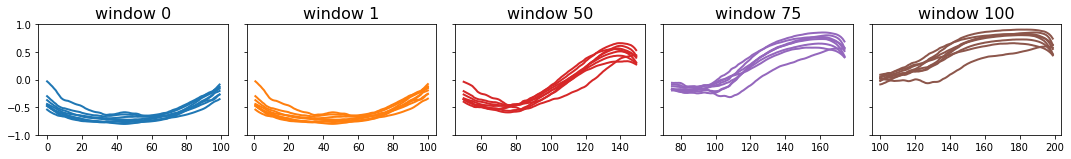

In [ ]:
# reconstructing the signal
X_hat, critic = tgan.predict(X)
# visualize X_hat
plot_rws(X_hat)

In [ ]:
X_hat.shape

(900, 100, 8)

In [ ]:
def unroll_ts(y_hat):
    predictions = list()
    pred_length = y_hat.shape[1]
    num_errors = y_hat.shape[1] + (y_hat.shape[0] - 1)

    for i in range(num_errors):
            intermediate = []

            for j in range(max(0, i - num_errors + pred_length), min(i + 1, pred_length)):
                intermediate.append(y_hat[i - j, j])

            if intermediate:
                predictions.append(np.median(np.asarray(intermediate)))

    return np.asarray(predictions[pred_length-1:])

In [ ]:
# flatten the predicted windows 
y_hat = unroll_ts(X_hat)
# plot the time series data 
#plot_ts([y, y_hat], labels=['original', 'reconstructed'])

In [ ]:
y_hat.shape

(900,)

In [ ]:
y = unroll_ts(X)

In [ ]:
y.shape

(900,)

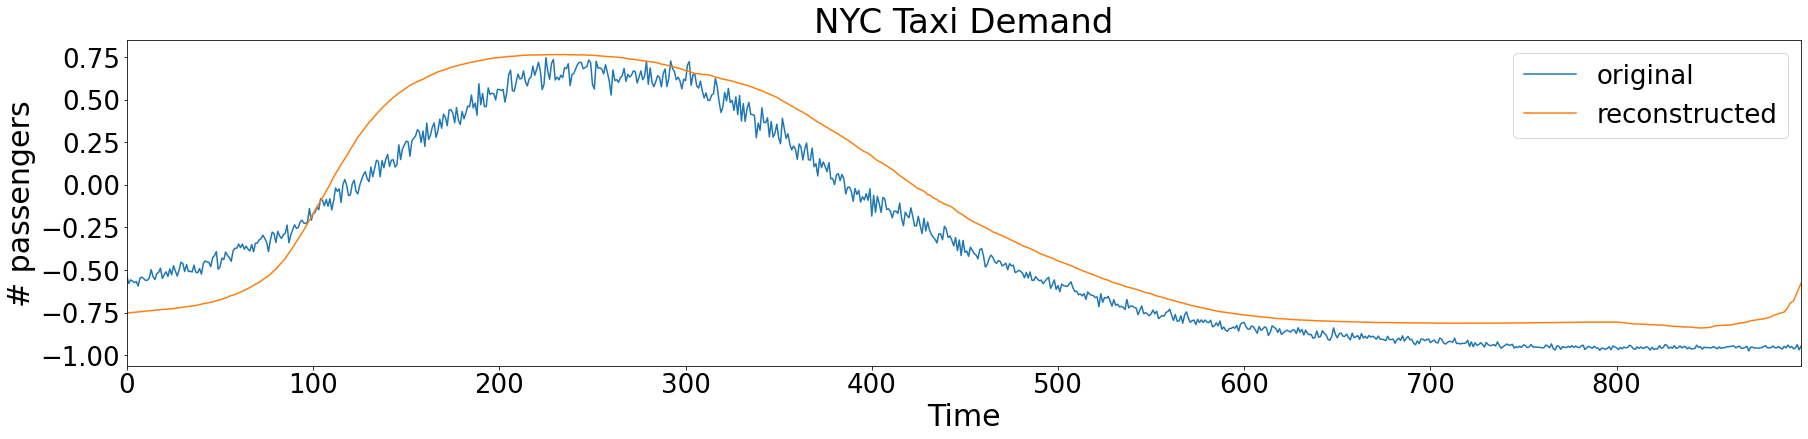

In [ ]:
plot_ts([y, y_hat], labels=['original', 'reconstructed'])

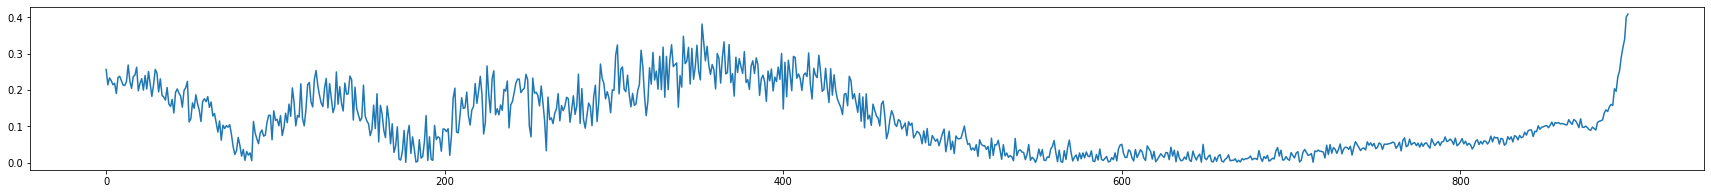

In [ ]:
# pair-wise error calculation
error = np.zeros(shape=y.shape)
length = y.shape[0]
for i in range(length):
    error[i] = abs(y_hat[i] - y[i])

# visualize the error curve
fig = plt.figure(figsize=(30, 3))
plt.plot(error)
plt.show()

## **Error Computation**

In [ ]:
from orion.primitives.tadgan import score_anomalies
error, true_index, true, pred = score_anomalies(X, X_hat, critic, X_index, rec_error_type="dtw", comb="mult")
pred = np.array(pred).mean(axis=2)
# visualize the error curve
plot_error([[true, pred], error])

ValueError: ignored

In [ ]:
# threshold to classify the high peak data points as anomolous points
thresh = 10

intervals = list()

i = 0
max_start = len(error)
while i < max_start:
    j = i
    start = index[i]
    while error[i] > thresh:
        i += 1
    
    end = index[i]
    if start != end:
        intervals.append((start, end, np.mean(error[j: i+1])))
        
    i += 1
        
intervals

In [ ]:
anomalies = pd.DataFrame(intervals, columns=['start', 'end', 'score'])
#now plotting the actual data, known anomalies and predicted anomalies
plot(df, [anomalies, known_anomalies])

In [ ]:
from orion.primitives.timeseries_anomalies import find_anomalies
# find anomalies
intervals = find_anomalies(error, index, 
                           window_size_portion=0.33, 
                           window_step_size_portion=0.1, 
                           fixed_threshold=True)
intervals

In [ ]:
# visualize the result
anomalies = pd.DataFrame(intervals, columns=['start', 'end', 'score'])
plot(df, [anomalies, known_anomalies])

# **End-to-End Pipeline Configuration**

In [ ]:
from orion import Orion
#paramter dictionary contains the parameter which are to be overridden.
parameters = {
    "mlprimitives.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            "interval": 3600 # hour level
        },
    'orion.primitives.tadgan.TadGAN#1': {
        'epochs': 15,
        }
}

orion = Orion(
    'tadgan.json',
    parameters
)

anomalies = orion.fit_detect(df)

In [ ]:
#Plotting the anomalies
plot(df, [anomalies, known_anomalies])

# **Evaluation Methods**

## **Dummy Dataset**

In [ ]:
#Let's assume that the signal starts at timestamp 1, and ends at timestamp 20. 
#We can then see that the ground truth contains three anomalies, namely (5, 8), (12, 13), and (17, 18),
#where (i, j) expresses the starting timestamp i and ending timestamp j.
#We can also see that, we detected two anomalies, namely (5, 8) and (12, 15). So how can we compare both sets?
import numpy as np
# to reproduce the same dummy signal
np.random.seed(0)
# dummy data
start, end = (1, 20)
signal = np.random.rand(end - start, 1)
ground_truth = [
    (5, 8),
    (12, 13),
    (17, 18)
]
anomalies = [
    (5, 8),
    (12, 15)
]

In [ ]:
#plotting the dummy dataset with the anomaly
import matplotlib.pyplot as plt

time = range(start, end)
plt.plot(time, signal)

# ground truth
for i, (t1, t2) in enumerate(ground_truth):
    plt.axvspan(t1, t2+1, color="g", alpha=0.2, label="ground_truth")

# detected
for i, (t1, t2) in enumerate(anomalies):
    plt.axvspan(t1, t2+1, color="r", alpha=0.2, label="detected")

    
plt.title("Example")
plt.xlabel("Time")
plt.ylabel("value")
plt.show()

### **Evaluation of dummy dataset through weighted segment**

In [ ]:
#we can use orion.evaluation subpackage to compute multiple metrics using the weighted segment approach. 
#For example to compute the accuracy, we use contextual_accuracy(..., weighted=True). 
#There are other metrics available, for reference checkout the orion.evaluation documentation.
from orion.evaluation.contextual import contextual_accuracy, contextual_f1_score
accuracy = contextual_accuracy(ground_truth, anomalies, start=start, end=end)
f1_score = contextual_f1_score(ground_truth, anomalies, start=start, end=end)
print("Accuracy score = {:0.3f}".format(accuracy))
print("F1 score = {:0.3f}".format(f1_score))

### **Evaluation of dummy dataset through overlapping segment**

In [ ]:
#Similarly, we can use the same metric functions, but with parameter weighted=False. 
#Note: overlap segment approach, does not account for true negatives. 
#Reason being, anomalies in time series data are rare and so "normal" instances will skew the value of the computed metric. 
#Therefore, using this approach we cannot compute metrics such as the accuracy. 
f1_score = contextual_f1_score(ground_truth, anomalies, start=start, end=end, weighted=False)
print("F1 score = {:0.3f}".format(f1_score))

## **Pipelin Evaluation End-to-End**

In [ ]:
from orion import Orion
from orion.data import load_signal, load_anomalies
#Importing all the methods for evaluation
from orion.evaluation.contextual import contextual_accuracy, contextual_f1_score, contextual_precision
metrics = [
    'f1',
    'recall',
    'precision',
]
orion = Orion(
    'tadgan.json'
)
signal = 'nyc_taxi'
# load signal
df = load_signal(signal)
# load ground truth anomalies
ground_truth = load_anomalies(signal)
#Evaluation scores mentioned in the metrics list
scores = orion.evaluate(df, ground_truth, fit=True, metrics=metrics)

In [ ]:
scores